In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
######################################################################
# CartPole ( https://www.gymlibrary.dev/environments/classic_control/cart_pole/ )
#=====================================================================
env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [3]:
# minimum and maximum of [cart_position, cart_velocity, pole_angle, pole_angular_velocity]
env.observation_space 

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [4]:
env.action_space # 0 or 1

Discrete(2)

In [5]:
env.action_space.sample() # random action

1

In [6]:
# take a random action
observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
observation, reward, terminated, truncated, info

(array([-0.04090108, -0.14988239,  0.04667398,  0.2716343 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [7]:
env_screen = env.render() # numpy.ndarray
env_screen.shape

(400, 600, 3)

In [8]:
env_screen

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [9]:
import gym
import numpy as np


# iteration
env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()

total_reward = 0
terminated = False
env_screens = []
while not terminated:
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    env_screen = env.render() # numpy.ndarray
    env_screens.append(env_screen)
    total_reward += reward

env.close()
total_reward

41.0

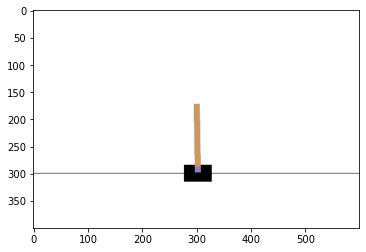

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

####################################################
# create an animation
#===================================================

fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
#plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())

In [11]:
#################################################################
# compute the expected reward if we always take random actions
#################################################################

import gym
import numpy as np

env = gym.make("CartPole-v1", render_mode="rgb_array")
EPOCHS = 1000
rewards = np.zeros(EPOCHS)

for epoch in range(EPOCHS):
    env.reset()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    total_reward = reward
    while not terminated:
        # take a random action
        action = env.action_space.sample()
        next_observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
    rewards[epoch] = total_reward
env.close()

rewards.mean() # expected reward is about 22

22.216

In [12]:
# observation
env.reset()
observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation

# 4 values of a state
print(cart_position, cart_velocity, pole_angle, pole_angular_velocity)

int_arr = (observation > 0).astype('int')
int_arr

-0.029012833 -0.20887002 -0.0065202126 0.27284232


array([0, 0, 0, 1])

In [31]:
###########################################################
# q learning  
###########################################################

# this script is not powerful but above average. 
# if you are lucky, you get more than 100 reward.
# the performance highly depends on parameters and random initial values.

import gym
import numpy as np

# there are only 2*2*2*2 states, because we only consider whether values of a state are positive or not
q_table = np.zeros((2, 2, 2, 2, 2)) # table of 2*2*2*2 states and action(0 or 1)
q_table = np.random.random((2, 2, 2, 2, 2))


# lucky q_table
lucky_q_table = np.array([[[[[6.05310543e-01, 1.00000000e+02],
          [1.19350474e-01, 1.00000000e+02]],

         [[1.00000000e+02, 7.94413049e-02],
          [3.29413088e-01, 1.00000000e+02]]],


        [[[1.00000000e+02, 1.25778298e-01],
          [1.00000000e+02, 3.21976198e-02]],

         [[1.00000000e+02, 4.37831761e-01],
          [2.90200363e-01, 1.00000000e+02]]]],



       [[[[1.00000000e+02, 2.77251434e-01],
          [2.54105273e-01, 1.00000000e+02]],

         [[1.00000000e+02, 2.25777596e-01],
          [1.69905737e-01, 1.00000000e+02]]],


        [[[1.00000000e+02, 6.55755678e-01],
          [1.00000000e+02, 2.05245357e-01]],

         [[1.00000000e+02, 9.97210854e-02],
          [6.44524379e-02, 1.00000000e+02]]]]])

q_table = lucky_q_table # please uncomment this line if you dont want to use the lucky_q_table


# parameters ()
ALPHA = 0.1 # learning rate
GAMMA = 0.99 # discount factor
eps = 1
epsilon_decay = 0.99

NUM_EPISODE = 3000
rewards = np.zeros(NUM_EPISODE)
env = gym.make("CartPole-v1", render_mode="rgb_array")
training=True

for episode in range(NUM_EPISODE):
    observation, info = env.reset() # initialize
    episode_reward = 0
    terminated = False
    while not terminated:
        is_pos_positive, is_cart_v_positive, is_angle_positive, is_angular_v_positive = (observation > 0).astype('int') 

        # choose an action by epsilon greedy method
        if np.random.random() <= eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[is_pos_positive, is_cart_v_positive, is_angle_positive, is_angular_v_positive, :])

        # take an action
        next_observation, reward, terminated, truncated, info = env.step(action)

        # q table update
        if training:
            is_next_pos_positive, is_next_cart_v_positive, is_next_angle_positive, is_next_angular_v_positive = (next_observation > 0).astype('int') 
            max_q = q_table[is_next_pos_positive, is_next_cart_v_positive, is_next_angle_positive, is_next_angular_v_positive,:].max()
            current_q = q_table[is_pos_positive, is_cart_v_positive, is_angle_positive, is_angular_v_positive, action] 
            q_table[is_pos_positive, is_cart_v_positive, is_angle_positive, is_angular_v_positive, action] += ALPHA * (reward + GAMMA * max_q - current_q)

        # prepare next iteration
        observation = next_observation
        episode_reward += reward
        eps *= epsilon_decay

    rewards[episode] = episode_reward
    if episode % 500 == 0 and episode != 0:
        print(f"{episode-500}-{episode-1} episode avg: {rewards[episode-500:episode].mean()}")

env.close()



0-499 episode avg: 189.426
500-999 episode avg: 185.344
1000-1499 episode avg: 180.426
1500-1999 episode avg: 198.118
2000-2499 episode avg: 201.188
